Saving nba_advanced_stats_2024_2025.csv to nba_advanced_stats_2024_2025.csv


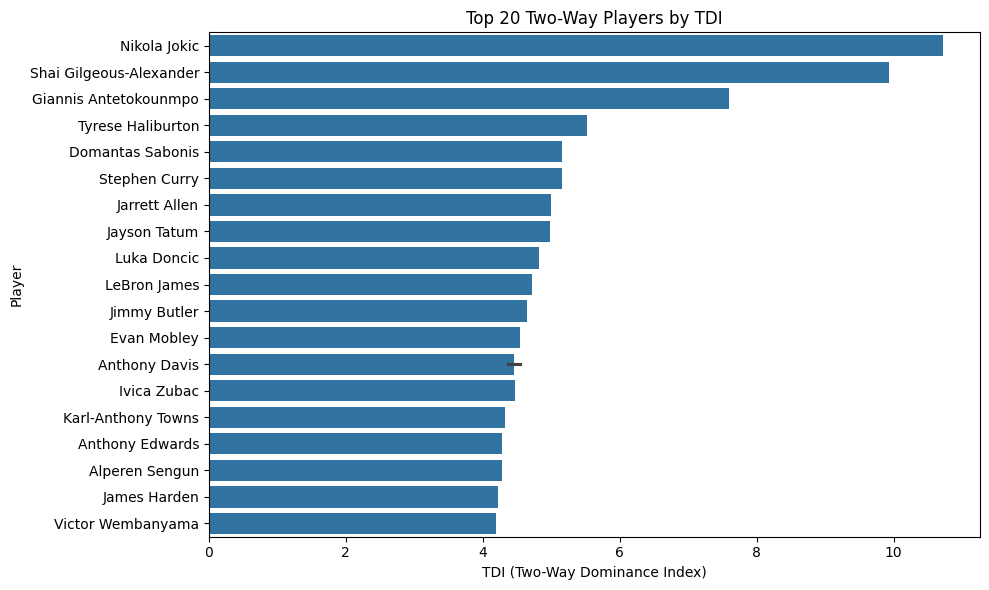

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# 📦 Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# 📁 Upload dataset
uploaded = files.upload()
df = pd.read_csv('nba_advanced_stats_2024_2025.csv')

# 🧹 Filter out irrelevant or low-sample players
df_filtered = df[(df['VORP'] > 0.1) & (df['WS'] > 0.1) & (df['PER'] > 5)]

# ❌ Drop rows with any missing values in needed columns
required_stats = ['OBPM', 'DBPM', 'BPM', 'WS']
df_tdi = df_filtered.dropna(subset=required_stats)

# 🧠 Compute Two-Way Dominance Index (TDI)
df_tdi['TDI'] = (
    0.25 * df_tdi['OBPM'] +
    0.25 * df_tdi['DBPM'] +
    0.25 * df_tdi['BPM'] +
    0.25 * df_tdi['WS']
)

# 🏀 Get top 20 TDI players
top_tdi = df_tdi.sort_values(by='TDI', ascending=False).head(20)

# 📈 Plot
plt.figure(figsize=(10,6))
sns.barplot(x='TDI', y='Player', data=top_tdi)
plt.title('Top 20 Two-Way Players by TDI')
plt.xlabel('TDI (Two-Way Dominance Index)')
plt.ylabel('Player')
plt.tight_layout()

# 💾 Save & Download chart
plt.savefig("two_way_dominance_index.png")
plt.show()

# 📤 Export CSV & Download
top_tdi.to_csv("top20_tdi.csv", index=False)
files.download("top20_tdi.csv")
files.download("two_way_dominance_index.png")